## Unemployment Data by month for 2020 - 2023
- Data is sourced from the Bureau of Labor Statistics (BLS) API
- Inlcudes unemployment rate for CA, FL, NY, TX, WA and National.

In [1]:
# Import dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key

In [2]:
# Set base URL
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

In [3]:
# Entering unemployment rates by states into dictionary so they can remain easily identifiable, and to also be used
# in the DataFrame to give names to columns
series_dict = {
    'LASST060000000000003': 'California',
    'LASST120000000000003': 'Florida',
    'LASST480000000000003': 'Texas',
    'LASST530000000000003': 'Washington',
    'LASST360000000000003': 'New York',
    'LNS14000000':'National'
}

# Follow specific format in BLS API format, requiring establishment of headers
headers = {'Content-type': 'application/json'}

In [4]:
# Parameters dictionary
data = json.dumps({
    'seriesid':list(series_dict.keys()), #retrieves list of the dictionary keys from series_dict
    'startyear':2020,
    'endyear':2023,
    'registrationkey':api_key})

In [5]:
# Use requests.post to submit the request to BLS API
bls = requests.post(f"{url}?",headers=headers,data=data).json()['Results']['series'] 

In [6]:
# pretty print to get a clearer look at the json
print(json.dumps(bls, indent=4, sort_keys=True))

[
    {
        "data": [
            {
                "footnotes": [
                    {}
                ],
                "period": "M12",
                "periodName": "December",
                "value": "5.1",
                "year": "2023"
            },
            {
                "footnotes": [
                    {}
                ],
                "period": "M11",
                "periodName": "November",
                "value": "5.1",
                "year": "2023"
            },
            {
                "footnotes": [
                    {}
                ],
                "period": "M10",
                "periodName": "October",
                "value": "5.1",
                "year": "2023"
            },
            {
                "footnotes": [
                    {}
                ],
                "period": "M09",
                "periodName": "September",
                "value": "5.0",
                "year": "2023"
            },
            {


In [7]:
# define function to collect all unemployment rates for 2020-2023 (stored in 'value' key)
def BLS_Unemployment(name):
    data = [] # define list to store data
    for x in range(len(bls)): # first loop through every element in bls
        if name == bls[x]['seriesID']: # if name = seriesID, then
            for y in range(len(bls[x]['data'])): # loop through the data key in that bls element
                data.append(float(bls[x]['data'][y]['value'])) # append data to list
    return data

In [8]:
# run function on each state
california = BLS_Unemployment('LASST060000000000003')
florida = BLS_Unemployment('LASST120000000000003')
texas = BLS_Unemployment('LASST480000000000003')
washington = BLS_Unemployment('LASST530000000000003')
new_york = BLS_Unemployment('LASST360000000000003')
national = BLS_Unemployment('LNS14000000')

# create list of months using list comprehension
month_string = [f"{x['year']}-{x['period'][1:]}-01" for x in bls[0]['data']]

In [9]:
# create DataFrame
unemployment_df = pd.DataFrame({
    "Month":pd.to_datetime(month_string), # cast string into datetime
    "California":california,
    "Florida":florida,
    "Texas":texas,
    "Washington":washington,
    "New York":new_york,
    "National":national
})

# Sort by ascending date, reset index
unemployment_df = (unemployment_df.sort_values("Month",ascending=True)).reset_index(drop=True)

# Display preview
unemployment_df.tail()

,Month,California,Florida,Texas,Washington,New York,National
43,2023-08-01,4.8,3.0,3.9,4.1,4.3,3.8
44,2023-09-01,5.0,3.0,3.9,4.3,4.4,3.8
45,2023-10-01,5.1,3.1,3.9,4.4,4.6,3.8
46,2023-11-01,5.1,3.1,3.9,4.4,4.6,3.7
47,2023-12-01,5.1,3.1,3.9,4.4,4.6,3.7


In [10]:
# Display statistical analysis of unemployment rate, by month 2020-2023
unemployment_df.iloc[:,1:].describe()

,California,Florida,Texas,Washington,New York,National
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,6.633333,4.695833,5.314583,5.479167,6.379167,5.175000
std,3.160887,2.895702,2.142080,2.670402,3.193141,2.581481
min,3.800000,2.700000,3.500000,3.700000,3.900000,3.400000
25%,4.475000,2.900000,3.900000,4.000000,4.100000,3.600000
50%,5.100000,3.250000,4.100000,4.300000,4.600000,3.800000
75%,8.325000,5.250000,6.250000,5.775000,7.950000,6.100000
max,16.100000,14.200000,12.800000,16.700000,16.700000,14.800000


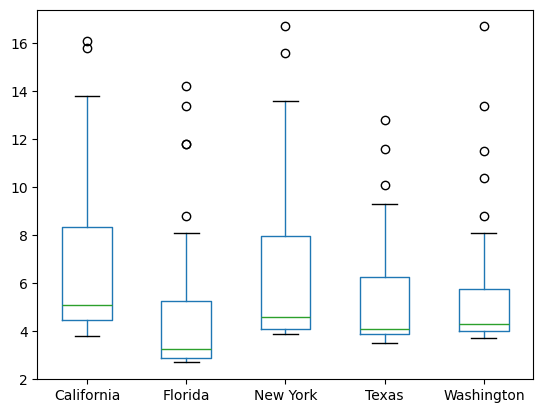

In [11]:
# Above statistical table shows that data is not normally distributed, therefore the mean is not a good summary
# of the data. We used a boxplot to confirm that.
unemployment_df.boxplot(['California','Florida','New York','Texas','Washington'], grid=False) 
plt.show()

In [12]:
# We opted for the median to get a summary of the data
unemployment_df.iloc[:,1:].median()

California    5.10
Florida       3.25
Texas         4.10
Washington    4.30
New York      4.60
National      3.80
dtype: float64

In [13]:
# Calculate differences between months, insert into new DataFrame
differences_in_unemployment = unemployment_df.iloc[:,1:].diff(periods=1,axis=0)

# Add months column, reorganize columns, cast months as datetime
differences_in_unemployment['Month'] = unemployment_df['Month'].values.tolist()
differences_in_unemployment = differences_in_unemployment[['Month','California','Florida','Texas','Washington','New York','National']]
differences_in_unemployment = differences_in_unemployment.astype({'Month':'datetime64[ns]'})

# Fill NaN (first row) with zeroes.
differences_in_unemployment = differences_in_unemployment.fillna(0)

In [14]:
# Display dataframe. Positive numbers mean unemployment rate went up, negative means decrease in unemployment rate
differences_in_unemployment

,Month,California,Florida,Texas,Washington,New York,National
0,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-01,0.1,0.0,0.1,0.1,0.0,-0.1
2,2020-03-01,1.1,1.1,1.4,1.4,0.1,0.9
3,2020-04-01,10.6,9.3,7.8,11.5,11.4,10.4
4,2020-05-01,-0.3,0.8,-1.2,-3.3,1.1,-1.6
5,2020-06-01,-2.0,-2.4,-1.5,-1.9,-3.1,-2.2
6,2020-07-01,-0.6,0.0,-0.8,-1.1,-1.1,-0.8
7,2020-08-01,-1.3,-3.0,-1.2,-1.6,-1.7,-1.8
8,2020-09-01,-1.9,-0.7,-0.4,-0.7,-0.6,-0.6
9,2020-10-01,-0.7,-1.0,-0.6,-0.9,-1.0,-1.0


In [15]:
# Show statistical analysis of differneces. This may be omitted.
differences_in_unemployment.iloc[:,1:].describe()

,California,Florida,Texas,Washington,New York,National
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.016667,0.002083,0.008333,0.014583,0.010417,0.002083
std,1.636204,1.500849,1.218795,1.814480,1.775032,1.618048
min,-2.000000,-3.000000,-1.500000,-3.300000,-3.100000,-2.200000
25%,-0.400000,-0.200000,-0.200000,-0.200000,-0.300000,-0.225000
50%,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
75%,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.600000,9.300000,7.800000,11.500000,11.400000,10.400000


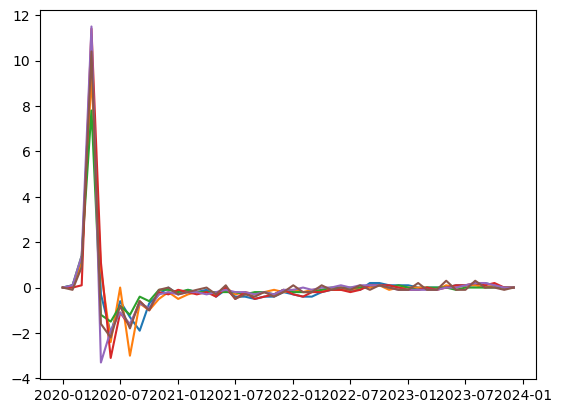

<Figure size 640x5000 with 0 Axes>

In [16]:
# Plot based on difference every month, unemployment rate
plt.plot(differences_in_unemployment['Month'],differences_in_unemployment['California'])
plt.plot(differences_in_unemployment['Month'],differences_in_unemployment['Florida'])
plt.plot(differences_in_unemployment['Month'],differences_in_unemployment['Texas'])
plt.plot(differences_in_unemployment['Month'],differences_in_unemployment['New York'])
plt.plot(differences_in_unemployment['Month'],differences_in_unemployment['Washington'])
plt.plot(differences_in_unemployment['Month'],differences_in_unemployment['National'])
plt.figure().set_figheight(50)

plt.show()

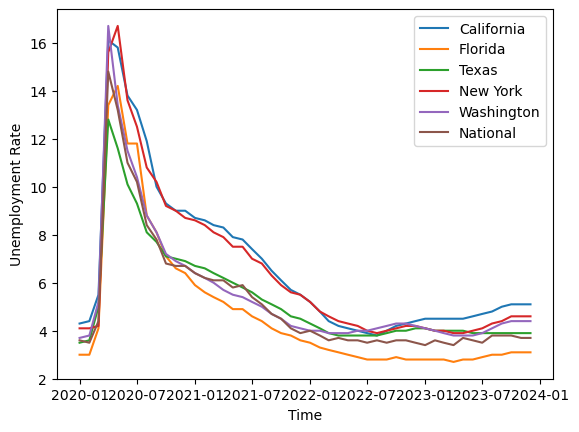

In [19]:
# Plot based on unemployment_df
plt.plot(unemployment_df['Month'],unemployment_df['California'])
plt.plot(unemployment_df['Month'],unemployment_df['Florida'])
plt.plot(unemployment_df['Month'],unemployment_df['Texas'])
plt.plot(unemployment_df['Month'],unemployment_df['New York'])
plt.plot(unemployment_df['Month'],unemployment_df['Washington'])
plt.plot(unemployment_df['Month'],unemployment_df['National'])
plt.legend(['California','Florida','Texas','New York','Washington','National'])
plt.ylabel("Unemployment Rate")
plt.xlabel("Time")
# Need to fix the spacing between dates
plt.show()

In [20]:
# Export unemployment_df into a csv
unemployment_df.to_csv("output/unemployment_rates_2020-2023.csv",index=False)